In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [60]:
%config Completer.use_jedi = False

In [61]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [62]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6895,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38986,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25595,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11294,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20919,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
import matplotlib.pyplot as plt

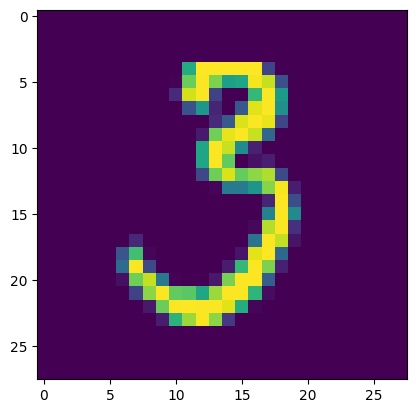

In [64]:
plt.imshow(df.iloc[9247,1:].values.reshape(28,28))

In [65]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [66]:
X.sample(5)
X.shape

(42000, 784)

In [67]:
Y.sample(5)

21329    0
8893     7
23926    0
30315    7
11273    7
Name: label, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [70]:
X_train.shape

(33600, 784)

In [71]:
y_train.shape

(33600,)

In [72]:
y_train.sample(5)

26545    6
23119    9
23596    0
10535    6
16329    1
Name: label, dtype: int64

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier()

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [76]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)


15.233869075775146


In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [90]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [80]:
from sklearn.decomposition import PCA

In [91]:
pca=PCA(n_components=100)

In [ ]:
accuracy=[]
for i in range(1,200):
    pca=PCA(n_components=i)
    X_train_new=X_train.copy()
    X_test_new=X_test.copy()
    X_train_new = pca.fit_transform(X_train_new)
    X_test_new = pca.transform(X_test_new)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))


plt.figure(figsize=(10,6))
plt.plot(range(1, 784), accuracy, marker='o')
plt.title("KNN Accuracy vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [93]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [96]:
knn.fit(X_train,y_train)
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)
print("Accuracy:",accuracy_score(y_test,y_pred))

1.819730281829834
Accuracy: 0.9545238095238096
